<a href="https://colab.research.google.com/github/abhiijndal/Data_viz/blob/main/IPL_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


In [ ]:
df=pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [ ]:
df.dropna()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
6666,336010,1,8,6,DJ Hussey,T Taibu,A Kumble,0,1,1,0,1,run out,DJ Hussey,"DW Steyn,MV Boucher",legbyes,Kolkata Knight Riders,Royal Challengers Bangalore
9098,336020,1,15,2,G Gambhir,S Dhawan,PP Ojha,0,1,1,0,1,stumped,G Gambhir,AC Gilchrist,wides,Delhi Daredevils,Deccan Chargers
21653,392217,2,16,6,ML Hayden,S Badrinath,SK Warne,0,1,1,0,1,stumped,ML Hayden,NV Ojha,wides,Chennai Super Kings,Rajasthan Royals
21871,392218,2,13,2,RE van der Merwe,MV Boucher,Harbhajan Singh,0,1,1,0,1,stumped,RE van der Merwe,YV Takawale,wides,Royal Challengers Bangalore,Mumbai Indians
22752,392222,1,17,6,K Goel,PP Chawla,SL Malinga,0,1,1,0,1,run out,PP Chawla,YV Takawale,wides,Kings XI Punjab,Mumbai Indians
24210,392228,2,17,1,A Symonds,RG Sharma,Mashrafe Mortaza,0,1,1,0,1,run out,A Symonds,Mashrafe Mortaza,noballs,Deccan Chargers,Kolkata Knight Riders
29190,419114,2,8,5,KD Karthik,MF Maharoof,Harbhajan Singh,0,1,1,0,1,stumped,KD Karthik,AP Tare,wides,Delhi Daredevils,Mumbai Indians
38616,419153,1,4,1,DJ Hussey,MK Tiwary,R Ashwin,0,1,1,0,1,stumped,DJ Hussey,MS Dhoni,wides,Kolkata Knight Riders,Chennai Super Kings
39969,419159,2,4,1,M Vijay,SK Raina,RR Powar,0,1,1,0,1,stumped,M Vijay,KC Sangakkara,wides,Chennai Super Kings,Kings XI Punjab
40669,419162,2,6,2,KP Pietersen,R Dravid,Harbhajan Singh,0,1,1,0,1,stumped,KP Pietersen,AT Rayudu,wides,Royal Challengers Bangalore,Mumbai Indians


In [ ]:
df.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df.describe

<bound method NDFrame.describe of              id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke    

In [ ]:
df.info

<bound method DataFrame.info of              id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke      

In [ ]:
df.shape

(193468, 18)

In [ ]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
col=["inning",'over','ball','batsman','bowler','batsman_runs','extras_type']
col


['inning', 'over', 'ball', 'batsman', 'bowler', 'batsman_runs', 'extras_type']

In [ ]:
data=df[col].copy()
data=data.dropna()
data

,inning,over,ball,batsman,bowler,batsman_runs,extras_type
25,1,10,6,RT Ponting,JH Kallis,0,byes
36,1,12,5,BB McCullum,JH Kallis,0,wides
49,1,14,5,BB McCullum,CL White,0,wides
79,1,0,1,SC Ganguly,P Kumar,0,legbyes
81,1,0,3,BB McCullum,P Kumar,0,wides
...,...,...,...,...,...,...,...
193237,1,14,2,RR Pant,NM Coulter-Nile,0,wides
193273,2,1,3,Q de Kock,K Rabada,0,legbyes
193377,1,18,4,SS Iyer,JJ Bumrah,0,legbyes
193452,1,11,1,SS Iyer,KA Pollard,0,wides


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

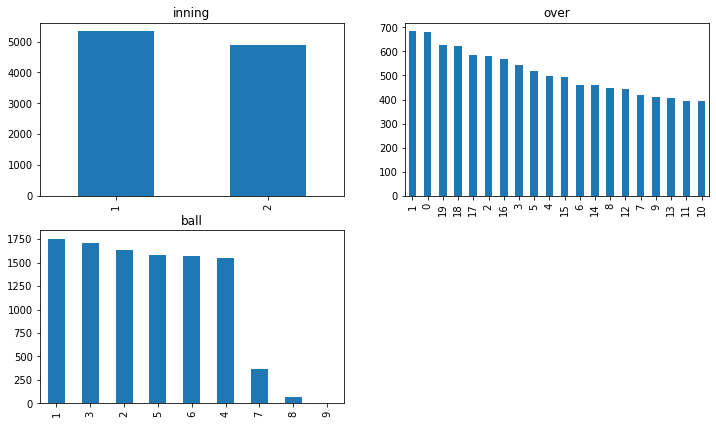

In [ ]:
plt.subplot(221)
data['inning'].value_counts().plot(kind='bar',title='inning',figsize=(12,7))
plt.subplot(222)
data['over'].value_counts().plot(kind='bar',title='over')
plt.subplot(223)
data['ball'].value_counts().plot(kind='bar',title='ball')
plt.show()

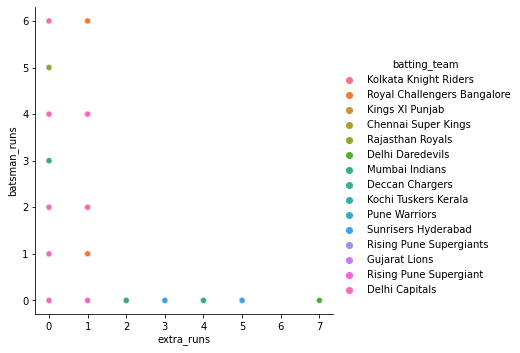

In [ ]:
sns.relplot(x='extra_runs',y='batsman_runs',hue='batting_team',data=df)

In [ ]:
corr=df.corr()
corr

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
id,1.000000,0.000300,0.007874,-0.001956,0.028446,-0.018331,0.024763,0.000249,-0.002822
inning,0.000300,1.000000,-0.046512,-0.003879,-0.007301,-0.000545,-0.007472,0.001463,-0.000998
over,0.007874,-0.046512,1.000000,-0.006877,0.086966,-0.001303,0.087345,-0.001185,0.073788
ball,-0.001956,-0.003879,-0.006877,1.000000,0.007168,-0.002487,0.006693,-0.002156,0.004573
batsman_runs,0.028446,-0.007301,0.086966,0.007168,1.000000,-0.140883,0.977587,0.019815,-0.170038
extra_runs,-0.018331,-0.000545,-0.001303,-0.002487,-0.140883,1.000000,0.070707,-0.001777,-0.041352
total_runs,0.024763,-0.007472,0.087345,0.006693,0.977587,0.070707,1.000000,0.019587,-0.180115
non_boundary,0.000249,0.001463,-0.001185,-0.002156,0.019815,-0.001777,0.019587,1.000000,-0.002066
is_wicket,-0.002822,-0.000998,0.073788,0.004573,-0.170038,-0.041352,-0.180115,-0.002066,1.000000


Text(0.5, 1.0, 'cor-relation')

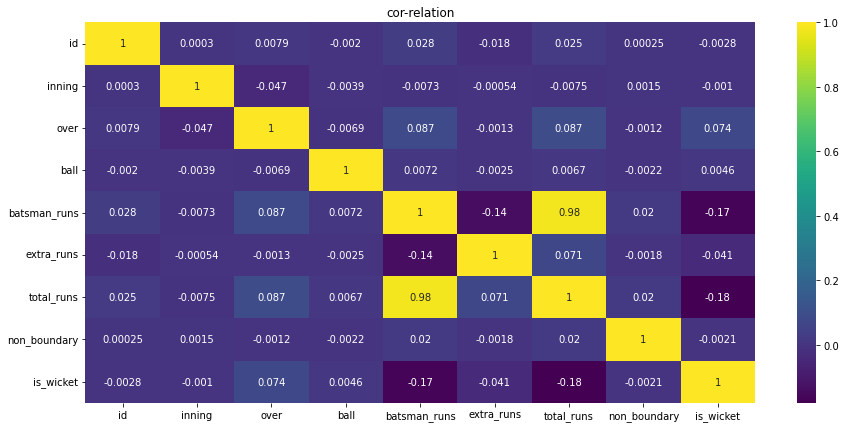

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.title("cor-relation")

<AxesSubplot:title={'center':'extras'}, xlabel='extras_type', ylabel='count'>

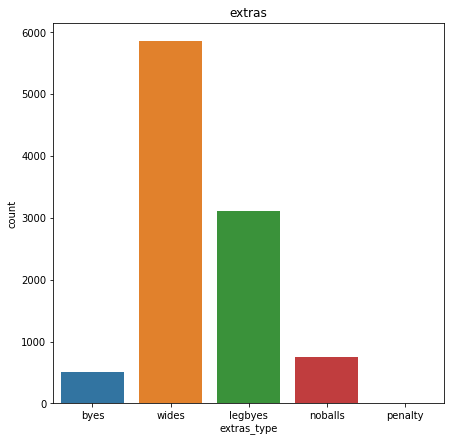

In [ ]:
plt.figure(figsize=(7,7))
plt.title('extras')
sns.countplot(x='extras_type',data=data)


In [ ]:
med=data.median()
med

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


inning          1.0
over            9.0
ball            4.0
batsman_runs    0.0
dtype: float64